<a href="https://colab.research.google.com/github/noahaim/Rock-paper-scissors/blob/main/Rock_Paper_Scissors_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Image Classification


##prepoccecing

###Importing our libraries for the project

In [ ]:
#!pip install tensorflow_decision_forests
#!pip install keras-tuner --upgrade

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

# import tensorflow_decision_forests as tfdf
import pandas as pd

# import PIL
# import PIL.Imageט
import cv2

# from kerastuner.tuners import RandomSearch
from tensorflow import keras
from keras.layers import Dense, Flatten,Conv2D,MaxPool2D,Dropout,AveragePooling2D
tfds.disable_progress_bar()

###Load rock_paper_scissors dataset

The dataset contains 2892 images of hands playing rock, paper, scissor game.
Its have two features- image (300, 300, 3) and lable.


In [23]:
#import the dataset from tensorflow_datasets library 
builder = tfds.builder('rock_paper_scissors')
info = builder.info 

Split Rock, Paper, Scissors data The train set contains 2520 images, and the test set contains 372 images.

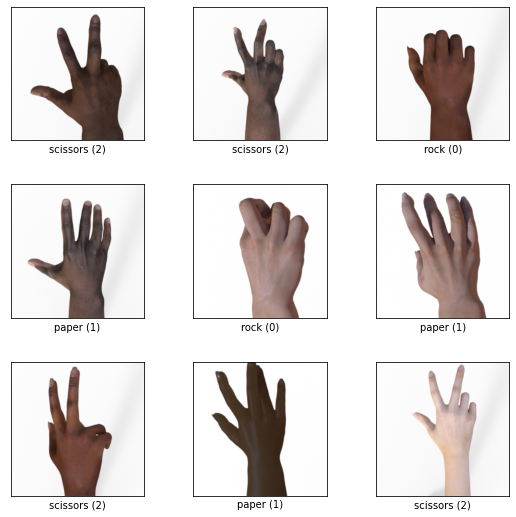

In [24]:
#load the train and test sets from the DB 
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")
# test_images = np.array([example['image'].numpy() for example in ds_test])
# train_images = np.array([example['image'].numpy() for example in ds_train])
# train_images = train_images.reshape(2520, 300, 300, 3)
# test_images = test_images.reshape(372, 300, 300, 3)
# image = train_images[1].reshape(300,300,3)
# plt.imshow(image)
fig = tfds.show_examples(ds_train,info)

Converting the tensorflow dataset format into numpy format,

Create numpy arrays that contains the images and the labels separately,

And change the images three color channels RGB format to one color channel (to reduce the unimportant data)

In [25]:
train_images1D = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images1D = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])
print(train_images1D.shape)
class_names = ['rock', 'paper', 'scissors']

(2520, 300, 300)


Reshaping the images to 300 x 300 x 1 (add color feature- grayscale images).

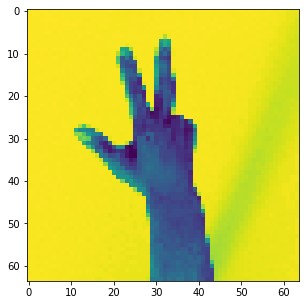

In [26]:
IMAGE_SIZE=64
train_images1D = train_images1D.reshape(2520, 300, 300, 1)
test_images1D = test_images1D.reshape(372, 300, 300, 1)

train_images = np.empty([2520, 64,64], dtype=int)
test_images = np.empty([372, 64,64], dtype=int)

for i in range(0,2520):
  train_images[i]=cv2.resize(train_images1D[i],dsize=(IMAGE_SIZE,IMAGE_SIZE))

for i in range(0,372):
  test_images[i]=cv2.resize(test_images1D[i],dsize=(IMAGE_SIZE,IMAGE_SIZE))

fig = plt.figure(figsize=(15,5))
image = train_images[300]
x = fig.add_subplot(1, 1, 1)
plt.imshow(image)

getting us ready to be able to convert it from a scale of 0 to 1 instead of 0 to 255

In [27]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

###Normalize the Data
Train images dividing equal by 255,
So the max value we can have is 255 because RGB values are between 0 and 255 so by doing this we're scaling every value to be between 0 & 1 and this is just a good common practice that helps you classify it.
It helps the basically network learn better than if you use the 0 to 255 values you could leave it 0 to 255 but it's just ultimately it's gonna probably decrease your performance a bit, so it's a common step to normalize between 0 & 1.

In [28]:
train_images /= 255
test_images /= 255

**Example of photos after we have arranged the information**

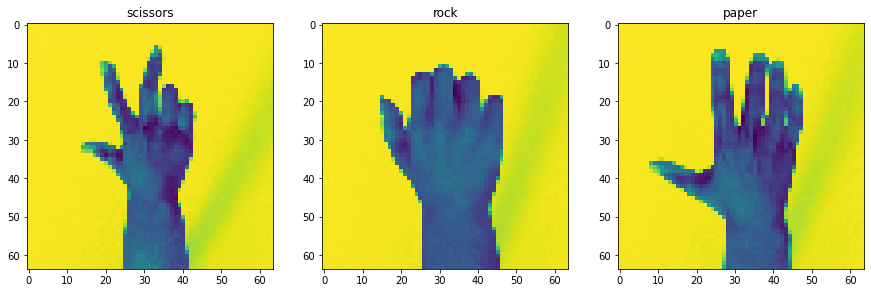

In [29]:
fig = plt.figure(figsize=(15,5))
for i in range(1,4):
  image = train_images[i]
  x = fig.add_subplot(1, 3, i)
  x.title.set_text(class_names[train_labels[i]])
  plt.imshow(image)

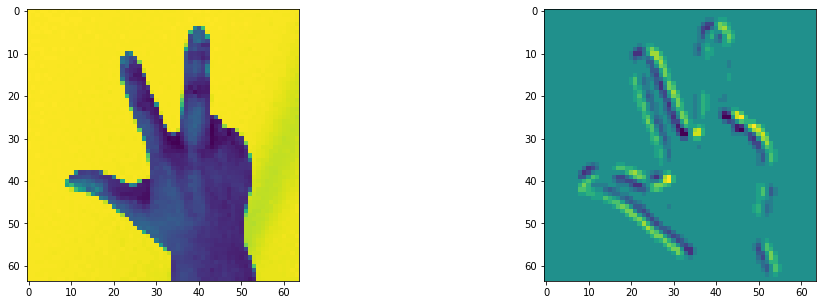

In [34]:
train_images_boundar= np.empty([2520, 64,64], dtype=int)
test_images_boundar= np.empty([372, 64,64], dtype=int)
fig = plt.figure(figsize=(17,5))
img=train_images[0]
fig.add_subplot(1,2,1)
plt.imshow(img)
# img_blur = cv2.GaussianBlur(img,(7,7), sigmaX=0, sigmaY=0)
# fig.add_subplot(1,2,2)
# plt.imshow(img)
# img2 = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
# fig.add_subplot(1,2,2)
# plt.imshow(img2)

for i in range(0,2520):
  img=train_images[i]
  # img_blur = cv2.GaussianBlur(img,(7,7), sigmaX=0, sigmaY=0)
  train_images_boundar[i] = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

for i in range(0,372):
  img=test_images[i]
  # img_blur = cv2.GaussianBlur(img,(7,7), sigmaX=0, sigmaY=0)
  test_images_boundar[i] = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

img2 = train_images_boundar[0]
fig.add_subplot(1,2,2)
plt.imshow(img2)



Create array with final score

In [35]:
finalScore=[0]*4
finalScoreBoundar=[0]*4

##Logistic regression


In [36]:
# Output layer.
model_lr = keras.Sequential([
   keras.layers.Flatten(),
   keras.layers.Dense(3, activation='softmax')
])


# adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model_lr.compile(
    optimizer=rmsprop_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)


Train and test the model on the basic images 

In [40]:
model_lr.fit(train_images, train_labels, epochs=10, batch_size=32)
x=model_lr.evaluate(test_images, test_labels)
finalScore[0]=x[1]

Epoch 1/10
79/79 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.7706
Epoch 2/10
79/79 [==============================] - 0s 4ms/step - loss: 0.6712 - accuracy: 0.7925
Epoch 3/10
79/79 [==============================] - 0s 4ms/step - loss: 0.6563 - accuracy: 0.7865
Epoch 4/10
79/79 [==============================] - 0s 3ms/step - loss: 0.6348 - accuracy: 0.7810
Epoch 5/10
79/79 [==============================] - 0s 4ms/step - loss: 0.5665 - accuracy: 0.8175
Epoch 6/10
79/79 [==============================] - 0s 4ms/step - loss: 0.5278 - accuracy: 0.8361
Epoch 7/10
79/79 [==============================] - 0s 4ms/step - loss: 0.5015 - accuracy: 0.8337
Epoch 8/10
79/79 [==============================] - 0s 4ms/step - loss: 0.5641 - accuracy: 0.8226
Epoch 9/10
79/79 [==============================] - 0s 4ms/step - loss: 0.4543 - accuracy: 0.8464
Epoch 10/10
12/12 [==============================] - 0s 3ms/step - loss: 2.4925 - accuracy: 0.4489


In [38]:
model_lr.fit(train_images_boundar, train_labels, epochs=10, batch_size=32)
x=model_lr.evaluate(test_images_boundar, test_labels)
finalScoreBoundar[0]=x[1]

Epoch 1/10
79/79 [==============================] - 1s 4ms/step - loss: 0.8195 - accuracy: 0.7095
Epoch 2/10
79/79 [==============================] - 0s 4ms/step - loss: 0.1722 - accuracy: 0.9567
Epoch 3/10
79/79 [==============================] - 0s 4ms/step - loss: 0.0715 - accuracy: 0.9861
Epoch 4/10
79/79 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 0.9933
Epoch 5/10
79/79 [==============================] - 0s 4ms/step - loss: 0.0155 - accuracy: 0.9972
Epoch 6/10
79/79 [==============================] - 0s 4ms/step - loss: 0.0083 - accuracy: 0.9984
Epoch 7/10
79/79 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.9988
Epoch 8/10
79/79 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 0.9996
Epoch 9/10
79/79 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/10
12/12 [==============================] - 0s 4ms/step - loss: 2.0879 - accuracy: 0.5188


##Convolutional Neural Network
This time the first layer will be Conv2D()  because the dataset consist of 2D images. The first variable inserted in the function is basically how many times a smaller gird is passing over the image <br>
this is how big or smaller grid is so if I said three and I didn't pass in three to start off and we'll leave the rides at one two one that just means they'll move one every time so it's gonna be a sliding window of three by three 

In [ ]:
# Instructions and exmaples of how to use Keras Tuner can be found in here 
# https://keras.io/keras_tuner/
from kerastuner.tuners import RandomSearch

# def build_model(hp):
model = keras.Sequential()

model.add(AveragePooling2D(6,3,input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))

model.add(Conv2D(64,3,activation='relu'))
model.add(Conv2D(32,3,activation='relu'))

model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
  #hp.Choise function will allow us to test out different variables for this dense layer 
# model.add(Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024,2048]), activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
          loss=keras.losses.SparseCategoricalCrossentropy(),
          metrics=['accuracy'])
  
  # return model

# randomSearch will run random combination we insert into the model until it reaches the max_trials or until all of the trials are done.
# the tuner will result in giving an array of models with different combination from the one which performed highest to the lowest
# we can get the models by using tuner.get_best_model()
# tuner = RandomSearch(
#     # calling the build model function
#     build_model, 
#     # our objective is the validation accuracy - how well will it do on our test set?
#     objective='val_accuracy',
#     max_trials=5,
# )
# what are we trying to optimise this network for? validation_data
# tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 5s 60ms/step - loss: 1.0216 - accuracy: 0.4952
Epoch 2/5
79/79 [==============================] - 4s 55ms/step - loss: 0.6363 - accuracy: 0.7750
Epoch 3/5
79/79 [==============================] - 4s 55ms/step - loss: 0.4104 - accuracy: 0.8698
Epoch 4/5
79/79 [==============================] - 4s 55ms/step - loss: 0.2996 - accuracy: 0.9107
Epoch 5/5
79/79 [==============================] - 4s 55ms/step - loss: 0.2093 - accuracy: 0.9440


In [ ]:
# tuner.get_best_models()[0].evaluate(test_images,test_labels)
x=model.evaluate(test_images, test_labels)
finalScore[1]=x[1]

12/12 [==============================] - 0s 20ms/step - loss: 0.7357 - accuracy: 0.7177


Flatt the arrays to use the data on ML models

In [41]:
train2D=train_images.flatten().reshape(2520,IMAGE_SIZE*IMAGE_SIZE)
test2D=test_images.flatten().reshape(372,IMAGE_SIZE*IMAGE_SIZE)

trainBoundar2D=train_images_boundar.flatten().reshape(2520,IMAGE_SIZE*IMAGE_SIZE)
testBoundar2D=test_images_boundar.flatten().reshape(372,IMAGE_SIZE*IMAGE_SIZE)

## k-NN


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_range = range(100, 1000, 100)
scores = []
scoresB = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train2D, train_labels)
    y_pred = knn.predict(test2D)
    knn.fit(trainBoundar2D, train_labels)
    y_pred_b=knn.predict(testBoundar2D)
    # print(accuracy_score(test_labels, y_pred))
    scores.append(accuracy_score(test_labels, y_pred))
    scoresB.append(accuracy_score(test_labels, y_pred_b))
print("score:",max(scores))
print("scores B",max(scoresB))
finalScore[2]=max(scores)
finalScoreBoundar[2]=max(scoresB)

score: 0.47043010752688175
scores B 0.3575268817204301


Text(0, 0.5, 'Testing Accuracy')

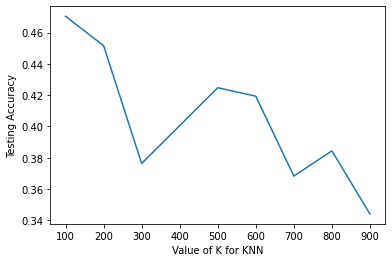

In [48]:

# allow plots to appear within the notebook
# %matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

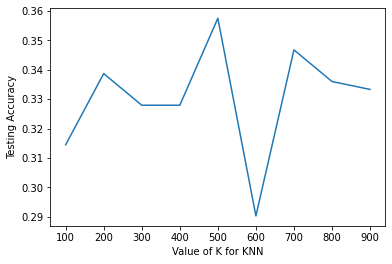

In [49]:
plt.plot(k_range, scoresB)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

train2D=train_images.flatten().reshape(2520,90000)
test2D=test_images.flatten().reshape(372,90000)

# knn = KNeighborsClassifier(n_neighbors=100)
# knn.fit(train2D, train_labels)
# predictions = knn.predict(test2D)
# print('KNN Accuracy: ',accuracy_score(test_labels,predictions))
k_neighbors = [20]
weights = ["uniform", "distance"]
dic_neighbors = dict(n_neighbors=k_neighbors, weights=weights)
knn = GridSearchCV(
     estimator = KNeighborsClassifier(),
     param_grid = dic_neighbors,
     scoring='accuracy',
     cv=5,
     n_jobs=-1
)
knn.fit(train2D,train_labels)
print(knn.best_score_)
predictions = knn.predict(test2D)
print('KNN Accuracy: ',accuracy_score(test_labels,predictions))

0.7337301587301588
KNN Accuracy:  0.33602150537634407


##Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

score=[0]*4
scoreB=[0]*4

estimators=[50,100,150,170]
for i in range(0,4):
  rf = RandomForestClassifier(n_estimators=estimators[i])
  rf.fit(train2D, train_labels)
  y_pred = rf.predict(test2D)
  rf.fit(trainBoundar2D, train_labels)
  y_pred_b = rf.predict(testBoundar2D)
  score.append(accuracy_score(test_labels, y_pred))
  scoreB.append(accuracy_score(test_labels, y_pred_b))
  # print(temp)
print(max(score))
print(max(scoreB))
finalScore[3]=max(score)
finalScoreBoundar[3]=max(scoreB)

0.5860215053763441
0.5510752688172043


## Adaboost

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix, plot_roc_curve

ABR = AdaBoostClassifier()
ABR.fit(train2D,train_labels)

predictions = ABR.predict(test2D)
print('AdaBoostClassifier Accuracy: ',accuracy_score(test_labels,predictions))
# ConfusionMatrixDisplay.from_estimator(ABR, test2D, test_labels, display_labels=np.array(['rock', 'paper', 'scissors']),
#                                       cmap=plt.cm.Blues)


AdaBoostClassifier Accuracy:  0.3682795698924731


## **Summary**

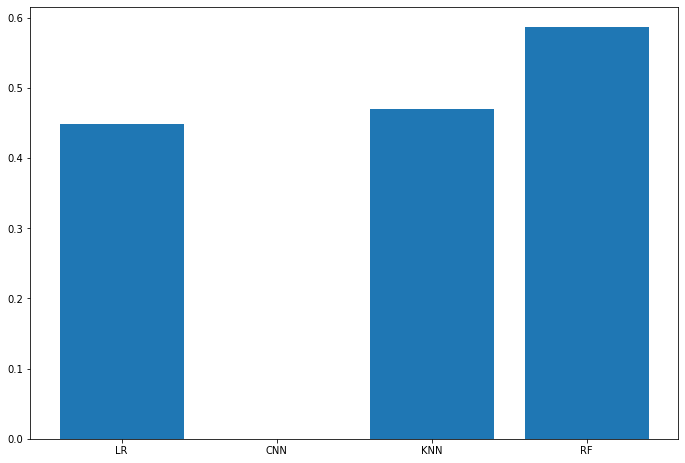

In [51]:
model = ['LR','CNN','KNN','RF']
plt.figure().add_axes([0,0,1.5,1.5]).bar(model,finalScore)
plt.show()

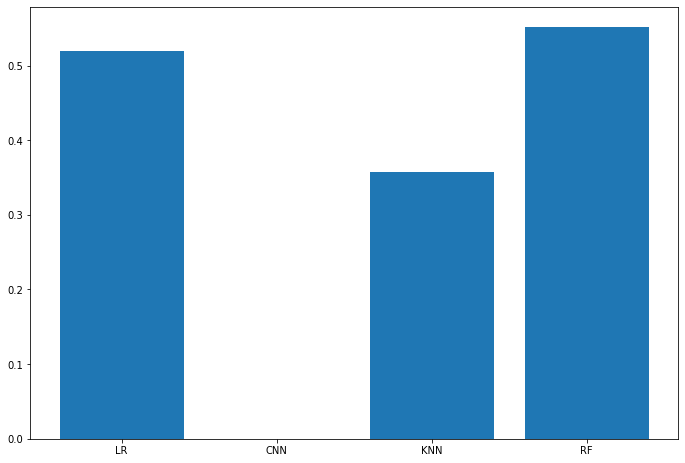

In [52]:
model = ['LR','CNN','KNN','RF']
plt.figure().add_axes([0,0,1.5,1.5]).bar(model,finalScoreBoundar)
plt.show()